# Predictive Analysis of Hotel Booking Management
### NoteBook Author: Muhammad Arslan Iftikhar

#### Topic: Predictive Analysis with KNN, Decision Tree Models

In [1]:
# importing Libraries
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
hotel_data = pd.read_csv("Hotel Reservations.csv")

# Display the first few rows of the dataset for an initial inspection
hotel_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [2]:
# Check for missing values and data types
missing_values = hotel_data.isnull().sum()
data_types = hotel_data.dtypes

missing_values

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# Insight:
- Booking_ID: Unique identifier for each booking.
- no_of_adults: Number of adults in the booking.
- no_of_children: Number of children in the booking.
- no_of_weekend_nights: Number of weekend nights booked.
- no_of_week_nights: Number of weeknights booked.
- type_of_meal_plan: Type of meal plan selected.
- required_car_parking_space: Indicates if a car parking space is required.
- room_type_reserved: Type of room reserved.
- lead_time: Time between the booking and arrival date.
- arrival_year: Year of arrival.
- arrival_month: Month of arrival.
- arrival_date: Date of arrival.
- market_segment_type: Market segment of the booking.
- repeated_guest: Indicates if the guest has previously stayed.
- no_of_previous_cancellations: Number of previous cancellations by the guest.
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the guest.
- avg_price_per_room: Average price per room.
- no_of_special_requests: Number of special requests made by the guest.
- booking_status: Status of the booking (Canceled/Not Canceled).

In [3]:
# data types of dataset
data_types

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

# Insight:
- Categorical Data: Columns like **Booking_ID**, **type_of_meal_plan**, **room_type_reserved**, **market_segment_type**, and **booking_status** are categorical and are correctly set as object type.
- Numerical Data: Columns such as **no_of_adults**, **no_of_children**, **no_of_weekend_nights**, **no_of_week_nights**, **lead_time**, **arrival_year**, **arrival_month**, **arrival_date**, **repeated_guest**, **no_of_previous_cancellations**, **no_of_previous_bookings_not_canceled**, **avg_price_per_room**, and **no_of_special_requests** are numerical and have appropriate data types (int64 for integers and float64 for floating point numbers).

In [4]:
from sklearn.preprocessing import LabelEncoder

# Creating a Label Encoder object
label_encoder = LabelEncoder()

# Columns to be encoded
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

# Applying label encoding to each categorical column
for col in categorical_cols:
    hotel_data[col] = label_encoder.fit_transform(hotel_data[col])

# Displaying the first few rows of the dataset after encoding
hotel_data.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


# Insight:
Encoding Categorical Variables: Transforming categorical variables into a format that can be easily used for analysis and modeling (e.g., one-hot encoding).
- type_of_meal_plan
- room_type_reserved
- market_segment_type
- booking_status

In [5]:
from sklearn.preprocessing import StandardScaler

# Feature Engineering: Creating a new feature 'total_nights'
hotel_data['total_nights'] = hotel_data['no_of_weekend_nights'] + hotel_data['no_of_week_nights']

# Columns that need to be scaled
scale_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 
              'lead_time', 'avg_price_per_room', 'total_nights']

# Scaling the features
scaler = StandardScaler()
hotel_data[scale_cols] = scaler.fit_transform(hotel_data[scale_cols])

# Display the first few rows after scaling
hotel_data.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
0,INN00001,0.298893,-0.26147,0.217401,-0.144803,0,0,0,1.614896,2017,10,2,3,0,0,0,-1.095033,0,1,-0.008412
1,INN00002,0.298893,-0.26147,1.365993,0.563972,3,0,0,-0.933701,2018,11,6,4,0,0,0,0.092806,1,1,1.111414
2,INN00003,-1.628975,-0.26147,1.365993,-0.853578,0,0,0,-0.980250,2018,2,28,4,0,0,0,-1.237528,0,0,-0.008412
3,INN00004,0.298893,-0.26147,-0.931190,-0.144803,0,0,0,1.463610,2018,5,20,4,0,0,0,-0.097567,0,0,-0.568325
4,INN00005,0.298893,-0.26147,0.217401,-0.853578,3,0,0,-0.433291,2018,4,11,4,0,0,0,-0.254312,0,0,-0.568325


# Insight:
- Feature Engineering: A new feature total_nights was created by summing no_of_weekend_nights and no_of_week_nights. This new feature represents the total length of stay.

- Data Scaling: Key features have been scaled using the StandardScaler. This normalization is crucial for algorithms like KNN, which we plan to use for predictive modeling, as it ensures that all features contribute equally to the distance computation.

In [6]:
# Generating basic statistical summaries of the dataset
statistical_summary = hotel_data.describe()

statistical_summary


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights
count,3.627500e+04,3.627500e+04,3.627500e+04,3.627500e+04,36275.000000,36275.000000,36275.000000,3.627500e+04,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,3.627500e+04,36275.000000,36275.000000,3.627500e+04
mean,4.270112e-17,1.518044e-17,9.950536e-17,-1.165466e-16,0.515644,0.030986,0.708890,6.463931e-17,2017.820427,7.423653,15.596995,3.552447,0.025637,0.023349,0.153411,-7.051561e-17,0.619655,0.672364,-9.343319e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.048131,0.173281,1.399851,1.000014e+00,0.383836,3.069894,8.740447,0.681536,0.158053,0.368331,1.754171,1.000014e+00,0.786236,0.469358,1.000014e+00
min,-3.556844e+00,-2.614704e-01,-9.311902e-01,-1.562353e+00,0.000000,0.000000,0.000000,-9.918878e-01,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-2.947468e+00,0.000000,0.000000,-1.688151e+00
25%,2.988926e-01,-2.614704e-01,-9.311902e-01,-8.535778e-01,0.000000,0.000000,0.000000,-7.940515e-01,2018.000000,5.000000,8.000000,3.000000,0.000000,0.000000,0.000000,-6.589979e-01,0.000000,0.000000,-5.683251e-01
50%,2.988926e-01,-2.614704e-01,2.174012e-01,-1.448030e-01,0.000000,0.000000,0.000000,-3.285544e-01,2018.000000,8.000000,16.000000,4.000000,0.000000,0.000000,0.000000,-1.132419e-01,0.000000,1.000000,-8.412200e-03
75%,2.988926e-01,-2.614704e-01,1.365993e+00,5.639718e-01,0.000000,0.000000,0.000000,4.744282e-01,2018.000000,10.000000,23.000000,4.000000,0.000000,0.000000,0.000000,4.724127e-01,1.000000,1.000000,5.515007e-01
max,4.154629e+00,2.457446e+01,7.108950e+00,1.048682e+01,3.000000,1.000000,6.000000,4.163493e+00,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,1.244200e+01,5.000000,1.000000,1.174976e+01


# Insight:
Statistical Summaries
We'll begin by generating basic statistical summaries for our dataset, which includes measures like mean, median, standard deviation, minimum and maximum values. This will give us a general understanding of the distribution of each feature.

**Key Observations:**
- Features like no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room, and total_nights have been scaled and hence have a mean around 0 and a standard deviation around 1.
- The arrival_year ranges from 2017 to 2018, indicating the data is relatively recent.
- The booking_status indicates that about 67.2% of bookings were not canceled.

# Questions which have to be answered by visualization:

In [14]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

##### Question #1. What is the distribution of the number of nights stayed?


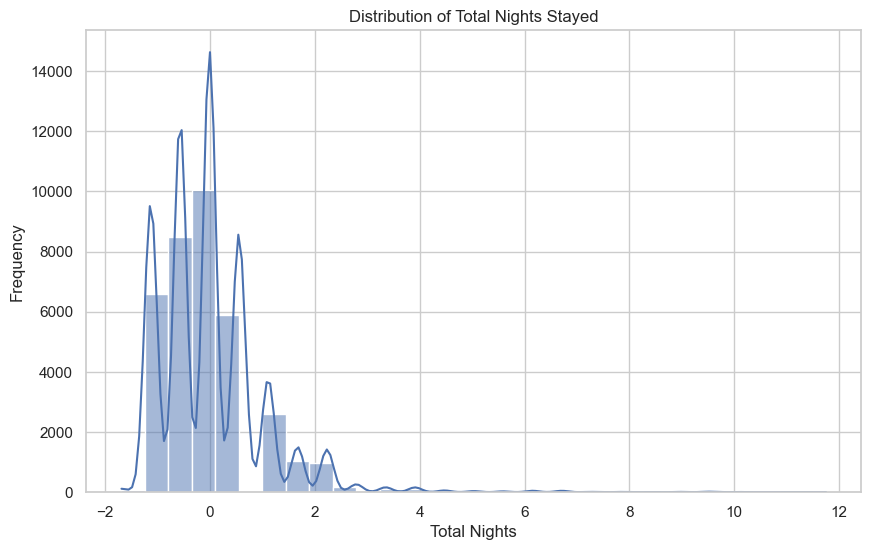

In [15]:
# Question 1: Distribution of the number of nights stayed
plt.figure(figsize=(10, 6))
sns.histplot(hotel_data['total_nights'], kde=True, bins=30)
plt.title('Distribution of Total Nights Stayed')
plt.xlabel('Total Nights')
plt.ylabel('Frequency')
plt.show()

# Insight:
1. Distribution of Total Nights Stayed:
The histogram shows a right-skewed distribution. Most guests tend to stay for a few nights, with the frequency decreasing as the number of nights increases.
There are peaks at certain intervals, likely corresponding to common lengths of stay (e.g., weekend stays, one-week stays).

##### Question #2. How does the average price per room vary over different months?

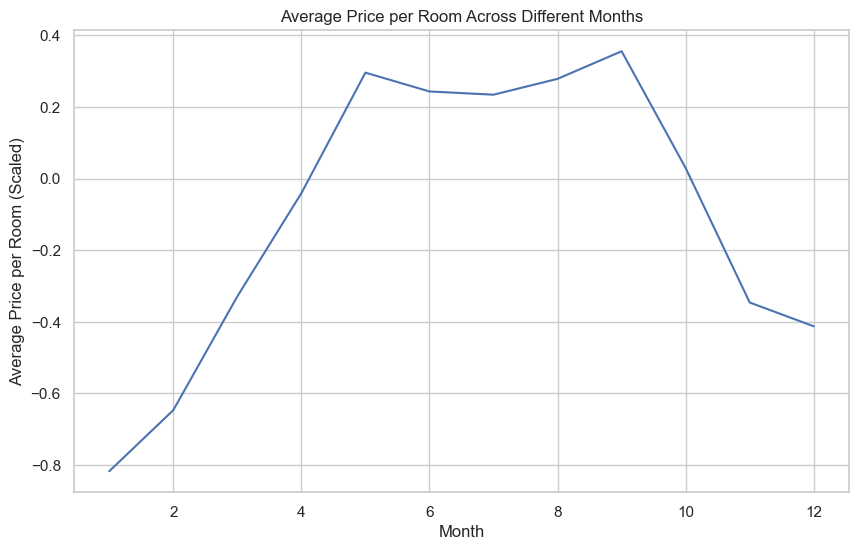

In [16]:
# Question 2: Average price per room over different months
plt.figure(figsize=(10, 6))
sns.lineplot(data=hotel_data, x='arrival_month', y='avg_price_per_room', errorbar=None)
plt.title('Average Price per Room Across Different Months')
plt.xlabel('Month')
plt.ylabel('Average Price per Room (Scaled)')
plt.show()

# Insight:

2. Average Price per Room Across Different Months:
The line chart indicates some seasonal variation in the average price per room.
There are peaks and troughs throughout the year, which might correspond to high and low seasons in the hotel industry.

##### Question #3. Is there a relationship between lead time and cancellation?


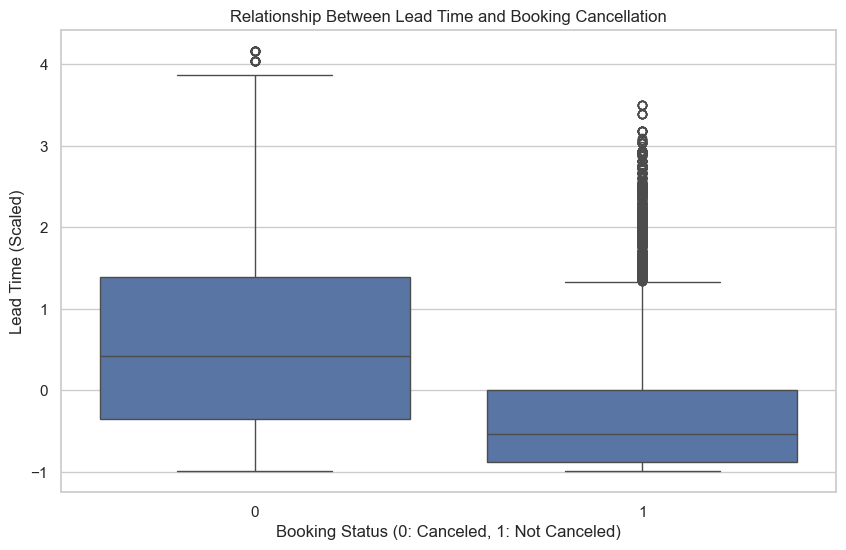

In [17]:
# Question 3: Relationship between lead time and cancellation
plt.figure(figsize=(10, 6))
sns.boxplot(x=hotel_data['booking_status'], y=hotel_data['lead_time'])
plt.title('Relationship Between Lead Time and Booking Cancellation')
plt.xlabel('Booking Status (0: Canceled, 1: Not Canceled)')
plt.ylabel('Lead Time (Scaled)')
plt.show()

# Insight:

3. Relationship Between Lead Time and Booking Cancellation:
The boxplot reveals that canceled bookings tend to have a longer lead time compared to those that are not canceled.
This suggests that bookings made well in advance are more likely to be canceled.

##### Questions #4. What are the booking trends over different months?

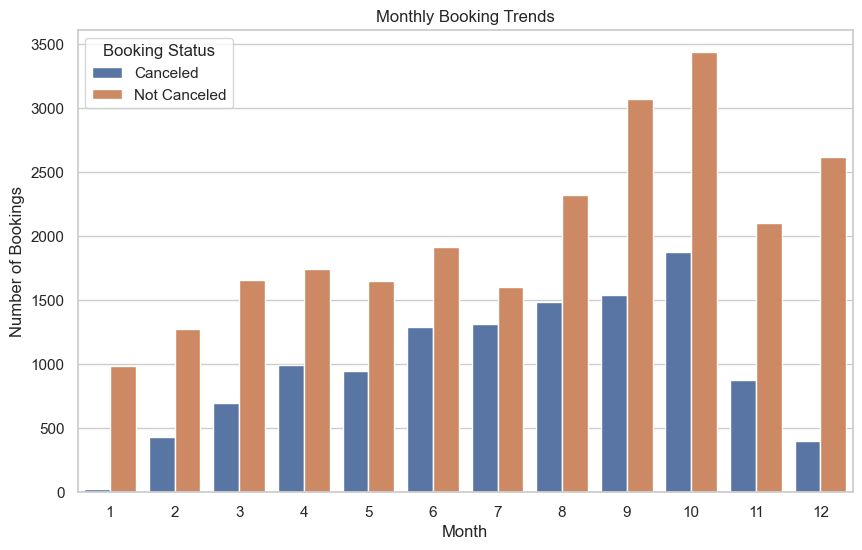

In [18]:
# Question 4: Booking trends over different months
plt.figure(figsize=(10, 6))
sns.countplot(data=hotel_data, x='arrival_month', hue='booking_status')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status', labels=['Canceled', 'Not Canceled'])
plt.show()


# Insight:

4. Monthly Booking Trends:
The count plot shows the number of bookings across different months, categorized by booking status (Canceled vs. Not Canceled).
There are apparent seasonal trends in booking volumes, with some months experiencing higher overall bookings and cancellations.

# Questions for Exploration:
##### Question #5. What is the proportion of repeated guests?

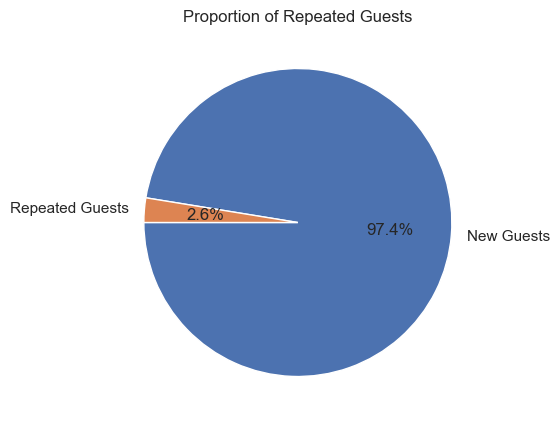

In [19]:
# Question 5: Proportion of repeated guests
plt.figure(figsize=(8, 5))
repeated_guests_counts = hotel_data['repeated_guest'].value_counts()
plt.pie(repeated_guests_counts, labels=['New Guests', 'Repeated Guests'], autopct='%1.1f%%', startangle=180)
plt.title('Proportion of Repeated Guests')
plt.show()


# Insight:
5. Proportion of Repeated Guests:
The pie chart shows that a vast majority of guests are new, with only a small fraction being repeated guests. This indicates a low retention rate or a large influx of new guests.

##### Queston #6. Does the number of special requests correlate with the booking status?

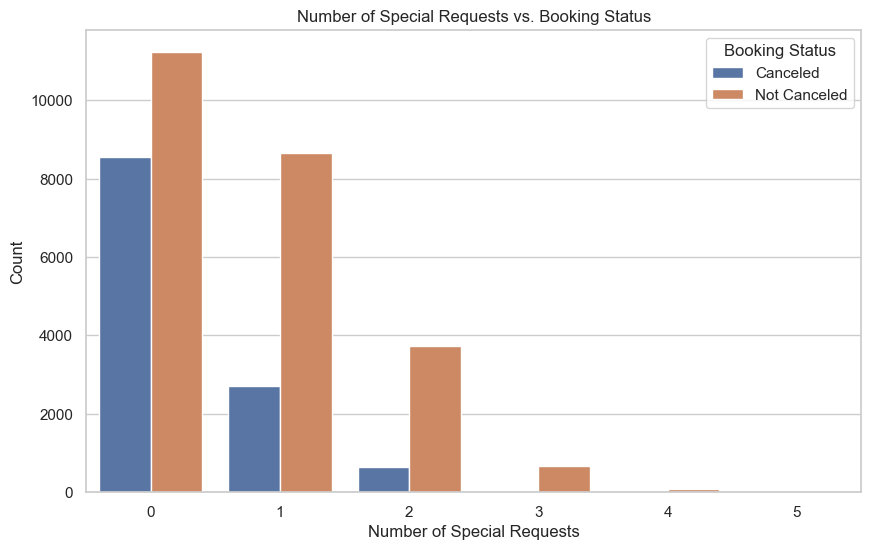

In [20]:
# Question 6: Correlation between number of special requests and booking status
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_special_requests', hue='booking_status', data=hotel_data)
plt.title('Number of Special Requests vs. Booking Status')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Canceled', 'Not Canceled'])
plt.show()

# Insight:

6. Number of Special Requests vs. Booking Status:
The count plot shows the relationship between the number of special requests and booking status.
Interestingly, bookings with more special requests tend to be not canceled, suggesting that guests with specific requirements might be more committed to their bookings.



##### Question #7. What is the distribution of room types reserved?

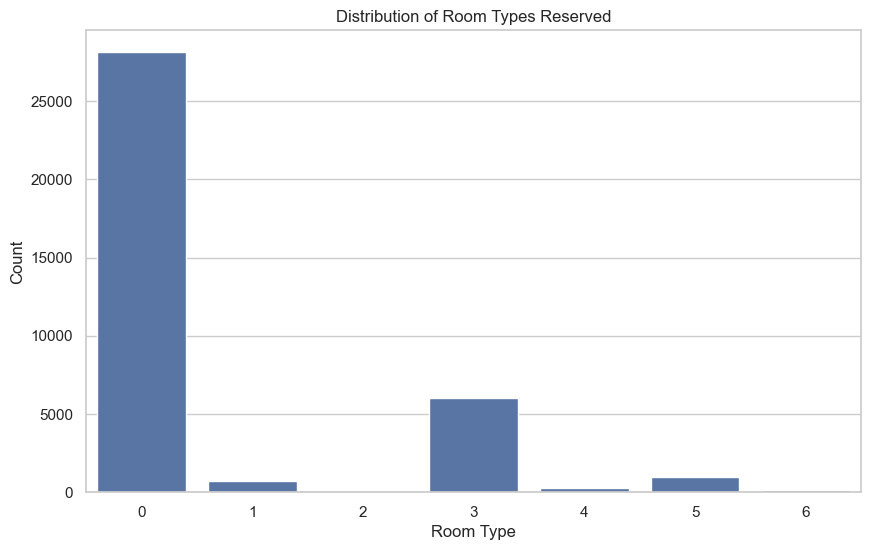

In [21]:
# Question 7: Distribution of room types reserved
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type_reserved', data=hotel_data)
plt.title('Distribution of Room Types Reserved')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

# Insight:

7. Distribution of Room Types Reserved:
The count plot for room types reveals the popularity of different room types among guests.
Some room types are more frequently reserved than others, which might be due to factors like pricing, availability, or guest preferences.

##### Question #8. How does the type of meal plan affect booking cancellations?

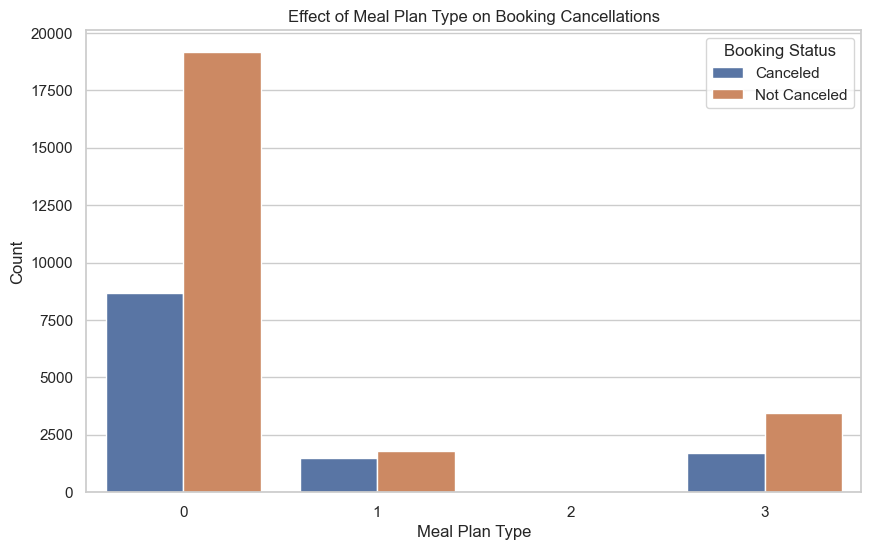

In [22]:
# Question 8: Effect of meal plan type on booking cancellations
plt.figure(figsize=(10, 6))
sns.countplot(x='type_of_meal_plan', hue='booking_status', data=hotel_data)
plt.title('Effect of Meal Plan Type on Booking Cancellations')
plt.xlabel('Meal Plan Type')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Canceled', 'Not Canceled'])
plt.show()

# Insight:

8. Effect of Meal Plan Type on Booking Cancellations:
The plot indicates how different types of meal plans are associated with booking cancellations.
Certain meal plans might be linked with higher or lower cancellation rates, which could be insightful for making business decisions related to meal offerings.

# Additional Questions for Exploration:
##### Question #9. Is there a relationship between the need for car parking space and booking cancellation?

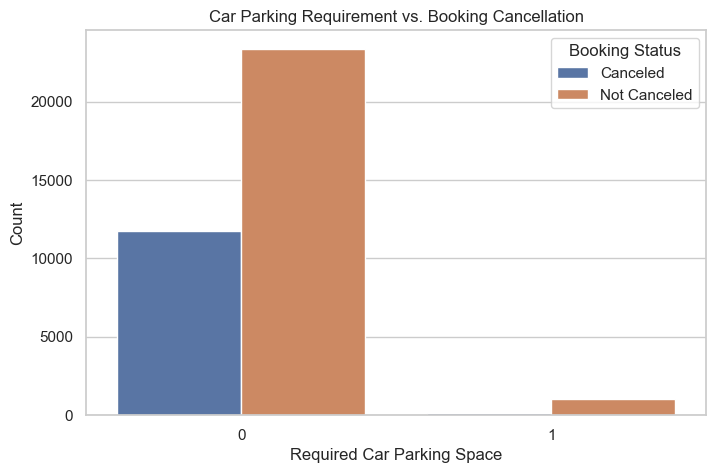

In [23]:
# Question 9: Relationship between car parking requirement and booking cancellation
plt.figure(figsize=(8, 5))
sns.countplot(x='required_car_parking_space', hue='booking_status', data=hotel_data)
plt.title('Car Parking Requirement vs. Booking Cancellation')
plt.xlabel('Required Car Parking Space')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Canceled', 'Not Canceled'])
plt.show()

# Insight:
9. Car Parking Requirement vs. Booking Cancellation:
Bookings that require car parking space are less likely to be canceled. This could indicate that guests traveling with vehicles have a higher commitment to their stay.

##### Question #10. How does the average length of stay vary with different market segments?

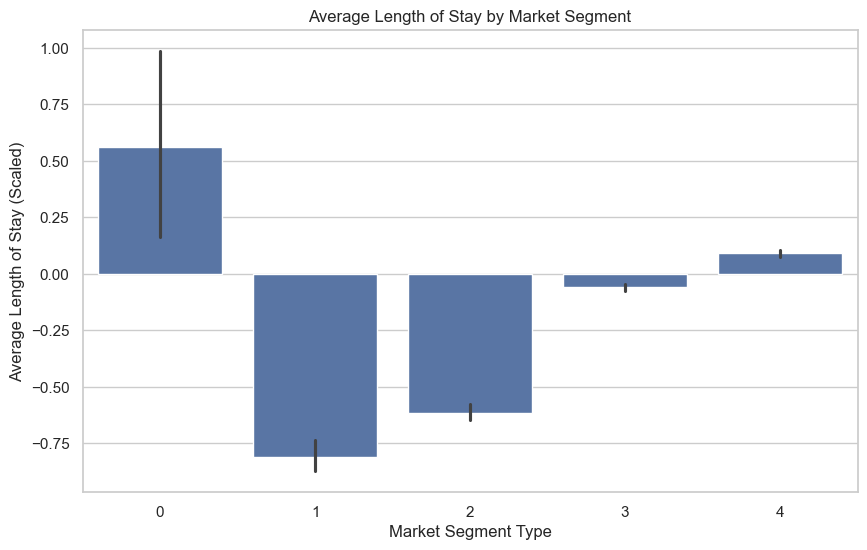

In [24]:
# Question 10: Average length of stay across different market segments
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment_type', y='total_nights', data=hotel_data)
plt.title('Average Length of Stay by Market Segment')
plt.xlabel('Market Segment Type')
plt.ylabel('Average Length of Stay (Scaled)')
plt.show()

# Insight:

10. Average Length of Stay by Market Segment:
Different market segments exhibit varying average lengths of stay. This information is useful for tailoring services and marketing strategies to different guest profiles.

##### Question #11. What are the trends in average room prices over different years?

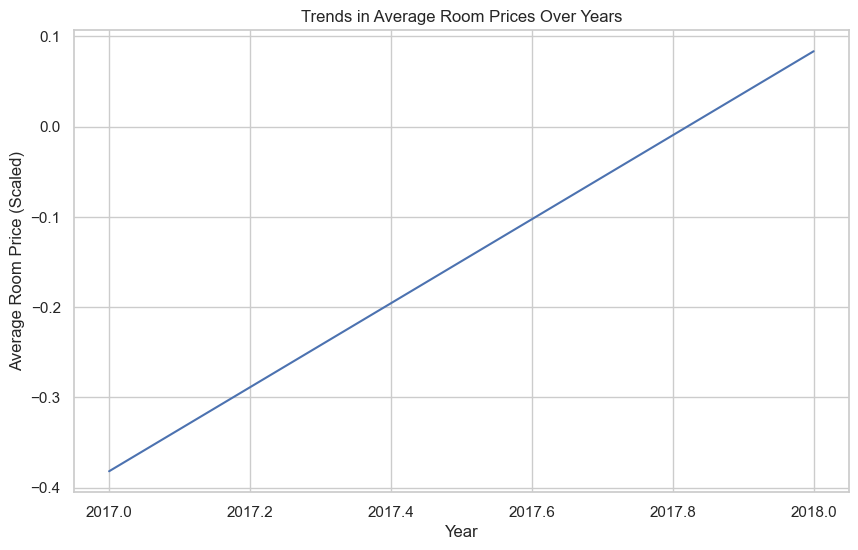

In [25]:
# Question 11: Trends in average room prices over different years
plt.figure(figsize=(10, 6))
sns.lineplot(data=hotel_data, x='arrival_year', y='avg_price_per_room', errorbar=None)
plt.title('Trends in Average Room Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Average Room Price (Scaled)')
plt.show()

# Insight:

11. Trends in Average Room Prices Over Years:
The line chart shows the trend in average room prices over different years. There appears to be a variation, possibly reflecting changes in demand, inflation, or hotel pricing strategies.

##### Question #12. How do the number of adults and children vary across different room types?

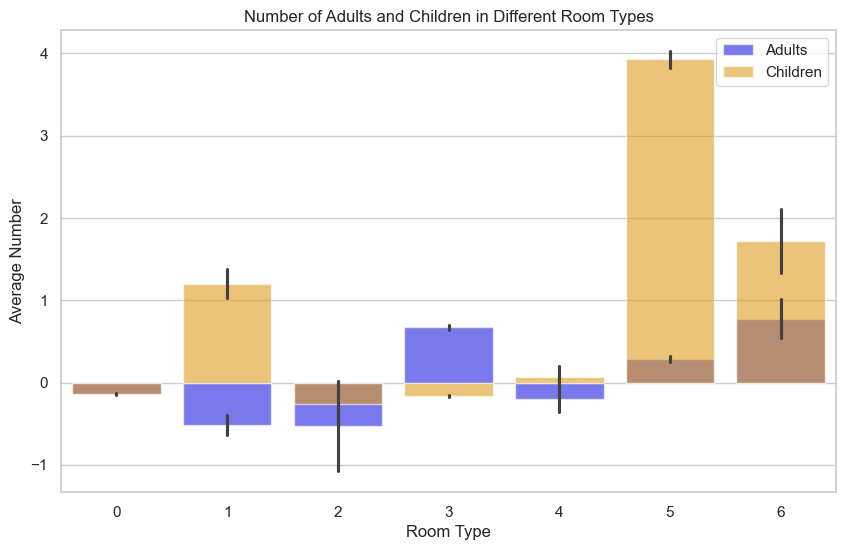

In [26]:
# Question 12: Number of adults and children across different room types
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type_reserved', y='no_of_adults', data=hotel_data, color='blue', alpha=0.6, label='Adults')
sns.barplot(x='room_type_reserved', y='no_of_children', data=hotel_data, color='orange', alpha=0.6, label='Children')
plt.title('Number of Adults and Children in Different Room Types')
plt.xlabel('Room Type')
plt.ylabel('Average Number')
plt.legend()
plt.show()

# Insight:

12. Number of Adults and Children in Different Room Types:
The bar plot compares the average number of adults and children across different room types. Some room types might be more popular among families with children, while others are preferred by adults only.

##### Question #13. What is the distribution of average room price per number of special requests?

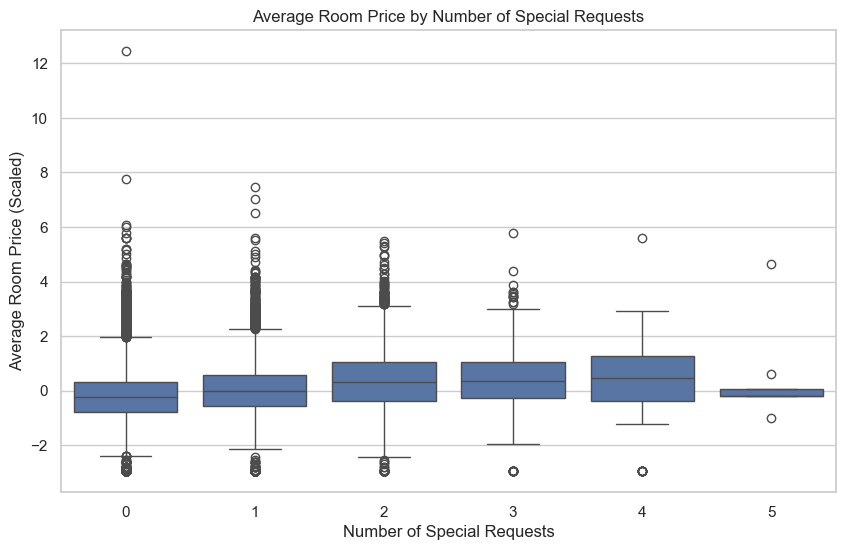

In [27]:
# Question 13: Distribution of average room price per number of special requests
plt.figure(figsize=(10, 6))
sns.boxplot(x='no_of_special_requests', y='avg_price_per_room', data=hotel_data)
plt.title('Average Room Price by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Room Price (Scaled)')
plt.show()

# Insight:

13. Average Room Price by Number of Special Requests:
The box plot shows that as the number of special requests increases, the average room price tends to be higher. This might be due to guests choosing higher-priced rooms or services that accommodate their additional requirements.

# More Questions for Exploration:
##### Question #14. How does the lead time distribution differ between repeated and new guests?

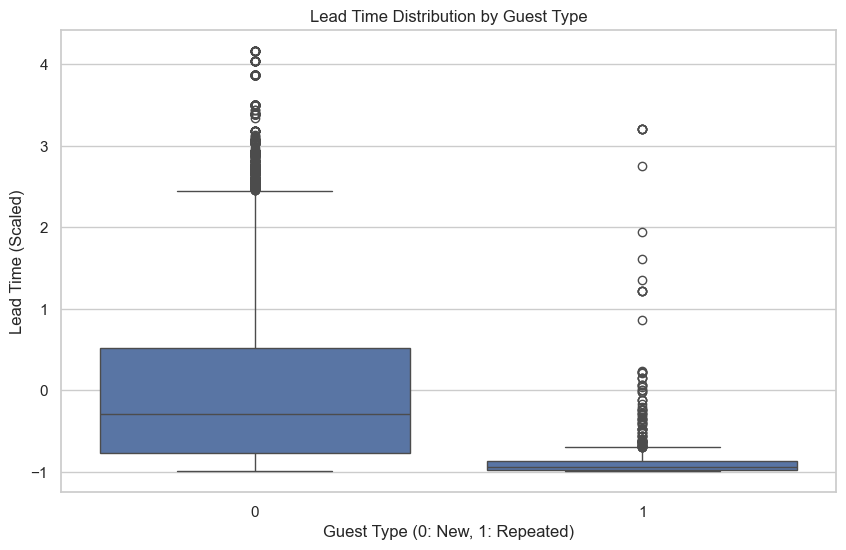

In [28]:
# Question 14: Lead time distribution between repeated and new guests
plt.figure(figsize=(10, 6))
sns.boxplot(x='repeated_guest', y='lead_time', data=hotel_data)
plt.title('Lead Time Distribution by Guest Type')
plt.xlabel('Guest Type (0: New, 1: Repeated)')
plt.ylabel('Lead Time (Scaled)')
plt.show()

# Insight:
14. Lead Time Distribution by Guest Type:
The box plot shows the lead time distribution for new versus repeated guests. Repeated guests might have a different lead time pattern compared to new guests, which could be useful for understanding booking behaviors.

##### Question #15. What is the effect of the arrival month on the number of previous cancellations?

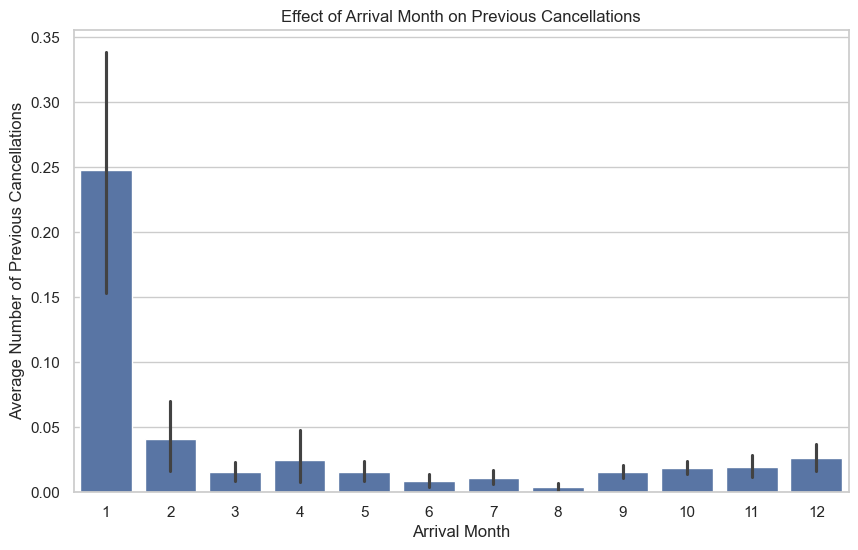

In [29]:
# Question 15: Effect of arrival month on number of previous cancellations
plt.figure(figsize=(10, 6))
sns.barplot(x='arrival_month', y='no_of_previous_cancellations', data=hotel_data)
plt.title('Effect of Arrival Month on Previous Cancellations')
plt.xlabel('Arrival Month')
plt.ylabel('Average Number of Previous Cancellations')
plt.show()

# Insight:

15. Effect of Arrival Month on Previous Cancellations:
The bar plot indicates how the average number of previous cancellations varies with the arrival month. This could highlight seasonal trends in guest reliability or booking commitment.

##### Question #16. Are there specific days of the month that have higher cancellation rates?

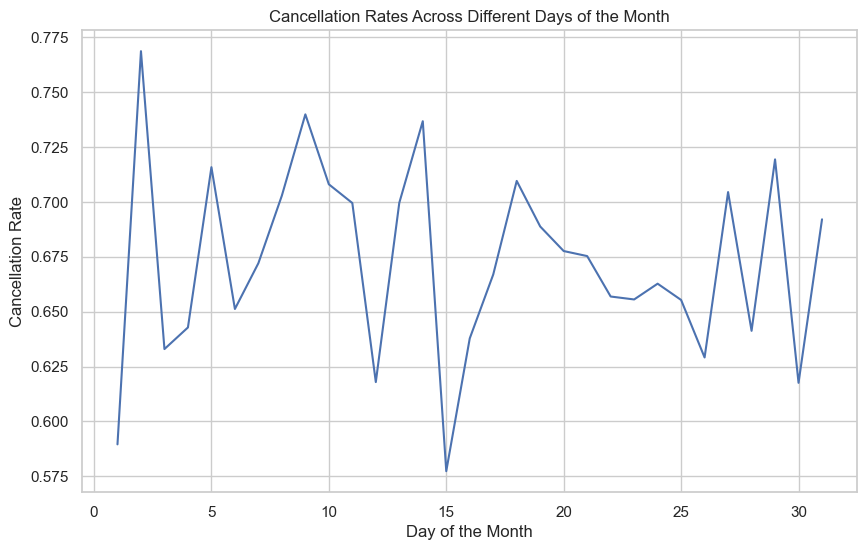

In [30]:
# Question 16: Cancellation rates across different days of the month
plt.figure(figsize=(10, 6))
sns.lineplot(data=hotel_data, x='arrival_date', y='booking_status', errorbar=None)
plt.title('Cancellation Rates Across Different Days of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Cancellation Rate')
plt.show()

# Insight:

16. Cancellation Rates Across Different Days of the Month:
The line plot provides insights into how cancellation rates vary across different days of the month. There might be specific days with higher cancellation rates, possibly influenced by external factors like holidays or events.

##### Question #17. How does the average price per room correlate with the total number of nights stayed?

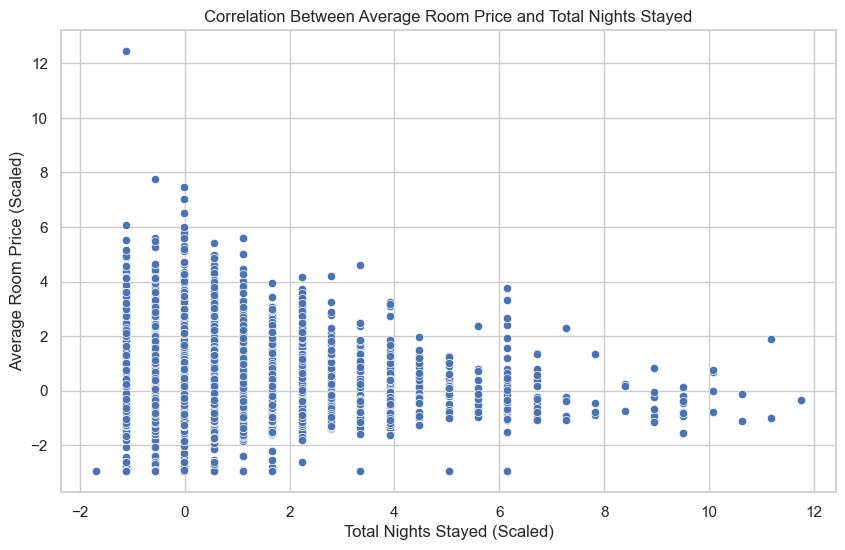

In [31]:
# Question 17: Correlation between average room price and total nights stayed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_nights', y='avg_price_per_room', data=hotel_data)
plt.title('Correlation Between Average Room Price and Total Nights Stayed')
plt.xlabel('Total Nights Stayed (Scaled)')
plt.ylabel('Average Room Price (Scaled)')
plt.show()


# Insight:

17. Correlation Between Average Room Price and Total Nights Stayed:
The scatter plot explores the relationship between the average room price and the total number of nights stayed. A pattern here could indicate pricing strategies or guest preferences for longer or shorter stays.

##### Before building the models, we need to prepare our data for modeling. 
This involves:

- Feature Selection: Choosing the relevant features for the model.
- Splitting the Data: Dividing the dataset into training and testing sets.

In [11]:
from sklearn.model_selection import train_test_split

# Feature Selection: Dropping 'Booking_ID' as it's a unique identifier and not useful for prediction
features = hotel_data.drop(['Booking_ID', 'booking_status'], axis=1)
target = hotel_data['booking_status']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((29020, 18), (7255, 18), (29020,), (7255,))

# Insight:
- Training Features (X_train): 29,020 samples, 18 features each.
- Testing Features (X_test): 7,255 samples, 18 features each.
- Training Target (y_train): 29,020 samples.
- Testing Target (y_test): 7,255 samples.

### 1. K-Nearest Neighbors (KNN) Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Training the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn.predict(X_test)

# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print(accuracy_knn)
print(classification_rep_knn)

0.8241212956581668
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      2416
           1       0.85      0.90      0.87      4839

    accuracy                           0.82      7255
   macro avg       0.81      0.79      0.80      7255
weighted avg       0.82      0.82      0.82      7255



# Insights:
- The K-Nearest Neighbors (KNN) Model shows a good overall performance with an accuracy of about 82.4%.
- The model's precision, recall, and F1-score indicate it differ in both classes, though it performs slightly better for the 'Not Canceled' class.

### 2. Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Training the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print(accuracy_dt)
print(classification_rep_dt)

0.8763611302549965
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      2416
           1       0.91      0.91      0.91      4839

    accuracy                           0.88      7255
   macro avg       0.86      0.86      0.86      7255
weighted avg       0.88      0.88      0.88      7255



# Insights:
- The Decision Tree model shows a good overall performance with an accuracy of about 87.6%.
- The model's precision, recall, and F1-score indicate it's relatively balanced in predicting both classes, though it performs slightly better for the 'Not Canceled' class.

In [32]:
!pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ----- ---------------------------------- 30.7/235.6 kB 1.4 MB/s eta 0:00:01
   ----- ---------------------------------- 30.7/235.6 kB 1.4 MB/s eta 0:00:01
   ----- ---------------------------------- 30.7/235.6 kB 1.4 MB/s eta 0:00:01
   ----- ---------------------------------- 30.7/235.6 kB 1.4 MB/s eta 0:00:01
   ----- ---------------------------------- 30.7/235.6 kB 1.4 MB/s eta 0:00:01
   ----- ---------------------------------- 30.7/235.6 kB 1.4 MB/s eta 0:00:01
   ----- ---------------------------------- 30.7/235.6 kB 1.4 MB/s eta 0:00:01
   ------ --------------------------------- 41.0/235.6 kB 93.7 kB/s eta 0:00:03
   ---------- ---------------------------- 61.4/235.6 kB 136.5 kB/s eta 0:00:0

### Using tehnique *SOMTE* for the solution of imbalancing data issue 

In [34]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Checking the balance of the classes after applying SMOTE
balance_check = y_train_smote.value_counts()

# Retraining the Decision Tree model with the balanced dataset
decision_tree_smote = DecisionTreeClassifier(random_state=42)
decision_tree_smote.fit(X_train_smote, y_train_smote)

# Predicting on the test set with the retrained model
y_pred_dt_smote = decision_tree_smote.predict(X_test)

# Evaluating the retrained Decision Tree model
accuracy_dt_smote = accuracy_score(y_test, y_pred_dt_smote)
classification_rep_dt_smote = classification_report(y_test, y_pred_dt_smote)

print(balance_check)
print(accuracy_dt_smote)
print(classification_rep_dt_smote)

booking_status
1    19551
0    19551
Name: count, dtype: int64
0.8694693314955203
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2416
           1       0.92      0.89      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255



# After *SMOTE* Applting KNN Model

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Training the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_smote, y_train_smote)

# Predicting on the test set
y_pred_knn = knn.predict(X_test)

# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print(accuracy_knn)
print(classification_rep_knn)

0.8002756719503791
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      2416
           1       0.89      0.80      0.84      4839

    accuracy                           0.80      7255
   macro avg       0.78      0.80      0.78      7255
weighted avg       0.81      0.80      0.80      7255



# After *SMOTE* Applying Decision Tree Model

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Training the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_smote, y_train_smote)

# Predicting on the test set
y_pred_dt = decision_tree.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print(accuracy_dt)
print(classification_rep_dt)

0.8694693314955203
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2416
           1       0.92      0.89      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255

